In [1]:
import sys
sys.path.append('../')

import time
import numpy as np
import sympy as sy
from sympy import *

from qsopt.plots import plot_optim, plot_countour

In [108]:
import numpy as np

def bracket_minimum(f, x=0, s=0.01):
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            return (a, c) if np.all(a < c) else (c, a)
        a, ya, b, yb = b, yb, c, yc

def golden_section(f, a, b, tol=1e-5):
    phi = (np.sqrt(5)-1)/2  # Golden ratio
    num_iter = 0
    beta = np.linalg.norm(b-a)
    alpha_e = a + (1 - phi)*beta
    alpha_d = a + (phi*beta)
    path = []
    
    while beta > tol:
        if f(alpha_e) < f(alpha_d):
            b = alpha_d
        else:
            a = alpha_e

        beta = np.linalg.norm(b-a)
        alpha_e = a + (1 - phi)*beta
        alpha_d = a + (phi*beta)

        num_iter += 1
        path.append((a+b)/2)
        
    alpha = (b + a) / 2
    fmin = f(alpha)

    result = {
        'method_name': 'Golden Search',
        'xopt': alpha,
        'fmin': fmin,
        'num_iter': num_iter,
        'path': np.array(path),
    }
    return result

import scipy.optimize as opt
def line_search(f, x, d, step_size=0.01):
    objective = lambda alpha: f(x + alpha * d)
    a, b = bracket_minimum(objective, s=step_size)
    alpha = opt.brent(objective, brack=(a, b))
    x_opt = x + alpha * d
    return {
        'method_name': 'Line Search',
        'alpha': alpha,
        'xopt': x_opt,
        'fmin': f(x_opt),
        'num_iter': 1,
        'function': f
    }

{'method_name': 'Line Search', 'alpha': 1.0000131874817875, 'xopt': array([-0.54698084, -1.54705996]), 'fmin': -2.913222894361052, 'num_iter': 1, 'function': <function f at 0x7f4a403c3380>}


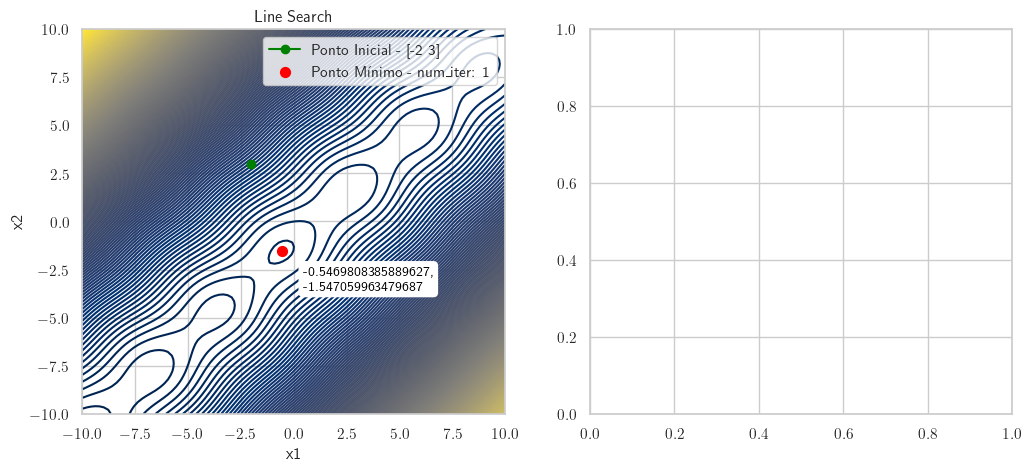

In [109]:
def f(x):
    return np.sin(x[0]+x[1]) + (x[0]-x[1])**2-1.5*x[0]+2.5*x[1] 

x0 = np.array([-2, 3])
d = np.array([1.453, -4.547])
method = line_search(f, x0, d, step_size=0.01)
print(method)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
plot_countour(f, x0, method,ax=ax[0], path=False)

{'method_name': 'Line Search', 'alpha': array([0.95454545]), 'xopt': array([0.04545455, 0.09090909]), 'fmin': array([-0.02272727]), 'num_iter': 1, 'function': <function f at 0x7f4a3d2c7b00>}


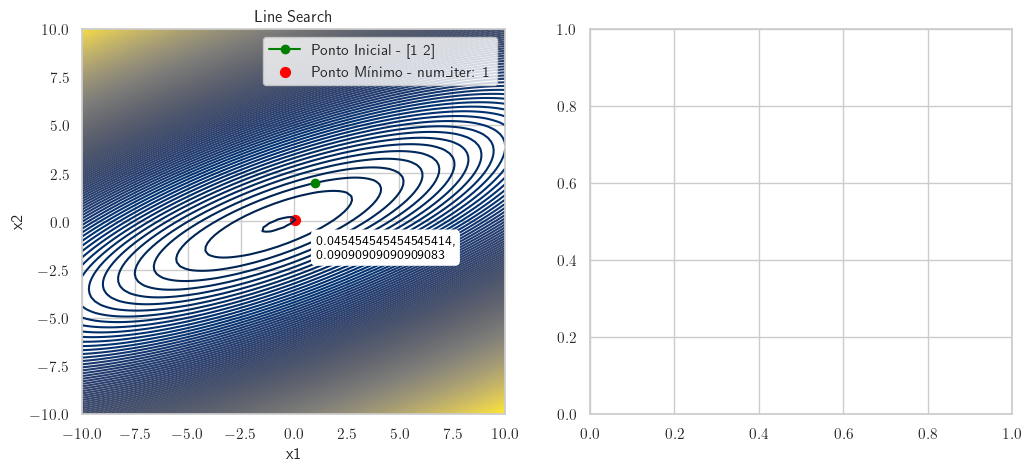

In [110]:
def f(x): 
    return x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]

def grad(x):
    return np.array([-3*x[0]+8*x[1]-1, 2*x[0]-3*x[1]+1])

hess = np.array([[-3, 8], [2, -3]])

x0 = np.array([1, 2])
d = np.array([-1, -2])

method = line_search(f, x0, d, step_size=0.01)
print(method)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
plot_countour(f, x0, method,ax=ax[0], path=False)

{'method_name': 'Line Search', 'alpha': -1.011348303232933, 'xopt': array([-3.03404491,  3.48297755]), 'fmin': 7.24849171783717, 'num_iter': 1, 'function': <function f at 0x7f4a3cbcc5e0>}


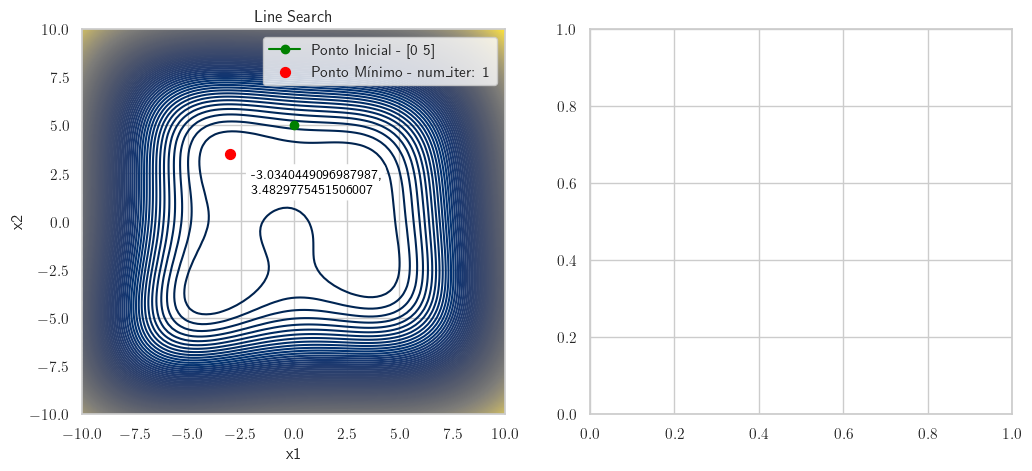

In [111]:
def f(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

x0 = np.array([0, 5])
d = np.array([3, 1.5])

method = line_search(f, x0, d)
print(method)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
plot_countour(f, x0, method,ax=ax[0], path=False)